# Imports and Read Data

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("playoff_data.csv", index_col=False)
df.head(10)

,Away,Home,Away Score,Home Score,Line,Over/Under,Away Rushing,Home Rushing,Away Passing,Home Passing
0,Green Bay Packers,Dallas Cowboys,34,27,Green Bay Packers -7.0,-1,102,187,28,31
1,Kansas City Chiefs,Green Bay Packers,10,35,Green Bay Packers -14.0,0.0 (over),72,130,32,24
2,Kansas City Chiefs,Buffalo Bills,31,7,Kansas City Chiefs -3.5,-1,113,40,24,27
3,Los Angeles Rams,Green Bay Packers,7,28,Los Angeles Rams -3.0,-1,75,163,31,23
4,Cleveland Browns,Dallas Cowboys,14,52,Dallas Cowboys -5.0,-1,159,178,30,15
5,Dallas Cowboys,Green Bay Packers,17,21,Green Bay Packers -7.0,-1,92,80,26,24
6,Oakland Raiders,Green Bay Packers,14,33,Green Bay Packers -13.5,43.0 (over),107,160,34,24
7,Houston Oilers,Oakland Raiders,7,40,Oakland Raiders -10.0,-1,38,263,35,26
8,Dallas Cowboys,Cleveland Browns,20,31,Dallas Cowboys -3.0,-1,86,102,32,25
9,Minnesota Vikings,Baltimore Colts,14,24,Baltimore Colts -11.0,-1,85,50,44,22


## Replace old team names with new team names

In [3]:
old_names_dict = {"San Diego Chargers": "Los Angeles Chargers",
            "Oakland Raiders": "Las Vegas Raiders",
            "Washington Redskins": "Washington Football Team",
            "Los Angeles Raiders": "Las Vegas Raiders",
            "St. Louis Rams": "Los Angeles Rams",
            "St. Louis Cardinals": "Arizona Cardinals",
            "Houston Oilers": "Tennessee Titans",
            "Baltimore Colts": "Indianapolis Colts"}

df["Away"].replace(old_names_dict, inplace=True)
df["Home"].replace(old_names_dict, inplace=True)

line_arr = list(df["Line"])
for i in range(len(line_arr)):
    if(line_arr[i] != "Pick"):
        dummy_line = line_arr[i].split(" -")
        team = dummy_line[0]
        score = dummy_line[1]

        if(team in old_names_dict):
            new_team = old_names_dict[team]
            new_line = new_team + " -" + score
            line_arr[i] = new_line
        
df["Line"] = line_arr


df.head(10)

,Away,Home,Away Score,Home Score,Line,Over/Under,Away Rushing,Home Rushing,Away Passing,Home Passing
0,Green Bay Packers,Dallas Cowboys,34,27,Green Bay Packers -7.0,-1,102,187,28,31
1,Kansas City Chiefs,Green Bay Packers,10,35,Green Bay Packers -14.0,0.0 (over),72,130,32,24
2,Kansas City Chiefs,Buffalo Bills,31,7,Kansas City Chiefs -3.5,-1,113,40,24,27
3,Los Angeles Rams,Green Bay Packers,7,28,Los Angeles Rams -3.0,-1,75,163,31,23
4,Cleveland Browns,Dallas Cowboys,14,52,Dallas Cowboys -5.0,-1,159,178,30,15
5,Dallas Cowboys,Green Bay Packers,17,21,Green Bay Packers -7.0,-1,92,80,26,24
6,Las Vegas Raiders,Green Bay Packers,14,33,Green Bay Packers -13.5,43.0 (over),107,160,34,24
7,Tennessee Titans,Las Vegas Raiders,7,40,Las Vegas Raiders -10.0,-1,38,263,35,26
8,Dallas Cowboys,Cleveland Browns,20,31,Dallas Cowboys -3.0,-1,86,102,32,25
9,Minnesota Vikings,Indianapolis Colts,14,24,Indianapolis Colts -11.0,-1,85,50,44,22


# Over/Under analysis

In [4]:
ou_df = df[["Away", "Home", "Away Score", "Home Score", "Over/Under"]]
ou_df["Over/Under"].unique()

array(['-1', '0.0 (over)', '43.0 (over)', '40.0 (under)', '39.0 (under)',
       '36.0 (under)', '34.0 (under)', '33.0 (under)', '36.0 (over)',
       '38.0 (over)', '37.0 (over)', '46.0 (over)', '38.0 (under)',
       '41.0 (under)', '45.0 (over)', '43.0 (under)', '37.5 (under)',
       '33.0 (over)', '31.5 (over)', '41.0 (over)', '45.0 (under)',
       '42.0 (over)', '48.0 (under)', '37.5 (over)', '44.5 (under)',
       '38.5 (over)', '46.5 (over)', '44.5 (over)', '53.0 (over)',
       '43.5 (under)', '48.0 (over)', '53.0 (under)', '38.5 (under)',
       '36.5 (over)', '44.0 (under)', '45.5 (under)', '44.0 (over)',
       '48.5 (over)', '47.0 (under)', '51.0 (under)', '53.5 (over)',
       '45.0 (push)', '40.5 (under)', '40.0 (over)', '39.0 (over)',
       '34.0 (over)', '47.0 (over)', '46.0 (under)', '38.0 (push)',
       '37.0 (under)', '35.0 (under)', '32.0 (under)', '35.0 (over)',
       '33.5 (over)', '41.5 (over)', '50.0 (under)', '35.5 (under)',
       '32.5 (over)', '52.0 (ov

### Clean df

In [5]:
# drop bad over under totals - not all games have lines available from data
ou_df = ou_df[(ou_df["Over/Under"] != "-1") & (ou_df["Over/Under"] != "0.0 (over)")]
ou_df["O/U Result"] = ou_df.apply(lambda row: row["Over/Under"].split()[1].replace("(", "").replace(")", ""), axis=1)
ou_df["Over/Under"] = ou_df.apply(lambda row: float(row["Over/Under"].split()[0]), axis=1)
ou_df.reset_index(drop=True, inplace=True)
ou_df

,Away,Home,Away Score,Home Score,Over/Under,O/U Result
0,Las Vegas Raiders,Green Bay Packers,14,33,43.0,over
1,New York Jets,Indianapolis Colts,16,7,40.0,under
2,Minnesota Vikings,Kansas City Chiefs,7,23,39.0,under
3,Dallas Cowboys,Indianapolis Colts,13,16,36.0,under
4,Miami Dolphins,Dallas Cowboys,3,24,34.0,under
...,...,...,...,...,...,...
447,Cleveland Browns,Kansas City Chiefs,17,22,55.5,under
448,Tampa Bay Buccaneers,New Orleans Saints,30,20,53.0,under
449,Buffalo Bills,Kansas City Chiefs,24,38,55.0,over
450,Tampa Bay Buccaneers,Green Bay Packers,31,26,53.0,over


## How good have the points totals been?

In [6]:
ou_df["O/U Result"].value_counts()

over     227
under    220
push       5
Name: O/U Result, dtype: int64

### Histogram of all O/U lines

(array([ 2.,  4., 13., 10.,  7., 13., 28., 35., 21., 20., 36., 21., 29.,
        28., 26., 29., 26., 27.,  8., 11., 13., 13., 10.,  7.,  7.,  4.,
         2.,  0.,  2.]),
 array([31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
        44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
        57., 58., 59., 60.]),
 <BarContainer object of 29 artists>)

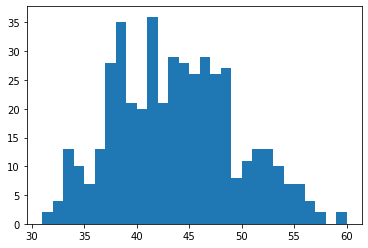

In [7]:
data = ou_df["Over/Under"]
min_val = min(data)
max_val = max(data)
val_range = max_val - min_val

plt.hist(data, bins=int(val_range))

### Calculate the margin of error from the line

In [8]:
ou_df["Total"] = ou_df["Away Score"] + ou_df["Home Score"]
ou_df["Difference"] = ou_df["Total"] - ou_df["Over/Under"]
ou_df.head()

,Away,Home,Away Score,Home Score,Over/Under,O/U Result,Total,Difference
0,Las Vegas Raiders,Green Bay Packers,14,33,43.0,over,47,4.0
1,New York Jets,Indianapolis Colts,16,7,40.0,under,23,-17.0
2,Minnesota Vikings,Kansas City Chiefs,7,23,39.0,under,30,-9.0
3,Dallas Cowboys,Indianapolis Colts,13,16,36.0,under,29,-7.0
4,Miami Dolphins,Dallas Cowboys,3,24,34.0,under,27,-7.0


### Histogram of actual points totals - o/u line

(array([ 1.,  0.,  0.,  0.,  1.,  5.,  1.,  3.,  2., 14.,  7., 14., 13.,
        15., 31., 18., 31., 23., 26., 24., 23., 26., 36., 21., 15.,  9.,
        17., 15., 15., 10.,  5.,  4.,  8.,  2.,  3.,  4.,  1.,  2.,  1.,
         0.,  2.,  1.,  1.,  1.,  0.,  1.]),
 array([-39.5       , -37.48913043, -35.47826087, -33.4673913 ,
        -31.45652174, -29.44565217, -27.43478261, -25.42391304,
        -23.41304348, -21.40217391, -19.39130435, -17.38043478,
        -15.36956522, -13.35869565, -11.34782609,  -9.33695652,
         -7.32608696,  -5.31521739,  -3.30434783,  -1.29347826,
          0.7173913 ,   2.72826087,   4.73913043,   6.75      ,
          8.76086957,  10.77173913,  12.7826087 ,  14.79347826,
         16.80434783,  18.81521739,  20.82608696,  22.83695652,
         24.84782609,  26.85869565,  28.86956522,  30.88043478,
         32.89130435,  34.90217391,  36.91304348,  38.92391304,
         40.93478261,  42.94565217,  44.95652174,  46.9673913 ,
         48.97826087,  50.989130

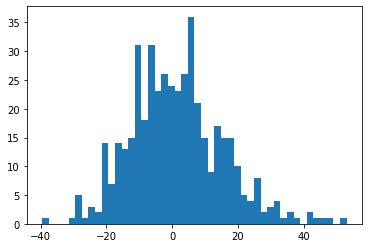

In [9]:
diff_df = ou_df["Difference"]
min_val = min(diff_df)
max_val = max(diff_df)
val_range = max_val - min_val

plt.hist(diff_df, bins=int(val_range/2))

### Calculate each team's record vs the o/u line

In [10]:
# create a list of unique team names from "Away" and "Home" combined
away_names = list(ou_df["Away"].unique())
home_names = list(ou_df["Home"].unique())
all_names = away_names + list(set(home_names) - set(away_names))

# convert to a dict
team_ou_dict = dict.fromkeys(all_names, [0,0])

In [11]:
# iterate through df and add [wins, total] as value for each team
# "push" counts as half a win

for i in range(len(ou_df)):
    away = ou_df.loc[i]["Away"]
    home = ou_df.loc[i]["Home"]
    
    away_arr = team_ou_dict[away]
    home_arr = team_ou_dict[home]
    
    away_wins = away_arr[0]
    away_appear = away_arr[1]
    home_wins = home_arr[0]
    home_appear = home_arr[1]
    
    if(ou_df.loc[i]["O/U Result"] == "over"):
        away_new_arr = [away_wins+1, away_appear+1]
        home_new_arr = [home_wins+1, home_appear+1]
    elif(ou_df.loc[i]["O/U Result"] == "push"):
        away_new_arr = [away_wins+0.5, away_appear+1]
        home_new_arr = [home_wins+0.5, home_appear+1]
    else:
        away_new_arr = [away_wins, away_appear+1]
        home_new_arr = [home_wins, home_appear+1]
    
    team_ou_dict[away] = away_new_arr
    team_ou_dict[home] = home_new_arr
    
team_ou_dict

{'Las Vegas Raiders': [12, 26],
 'New York Jets': [13, 23],
 'Minnesota Vikings': [18, 36],
 'Dallas Cowboys': [25, 42],
 'Miami Dolphins': [9.5, 31],
 'Washington Football Team': [12.5, 30],
 'Pittsburgh Steelers': [34, 47],
 'Denver Broncos': [22, 38],
 'Los Angeles Rams': [13, 28],
 'Tennessee Titans': [11.5, 28],
 'Buffalo Bills': [16, 29],
 'New York Giants': [12, 32],
 'Tampa Bay Buccaneers': [7, 17],
 'Los Angeles Chargers': [8, 24],
 'San Francisco 49ers': [24, 47],
 'Arizona Cardinals': [9, 12],
 'New England Patriots': [25.5, 54],
 'Cleveland Browns': [10.5, 15],
 'Detroit Lions': [7, 12],
 'Atlanta Falcons': [14.5, 22],
 'Green Bay Packers': [32, 45],
 'Seattle Seahawks': [18, 35],
 'Chicago Bears': [11.5, 23],
 'Kansas City Chiefs': [12, 28],
 'Indianapolis Colts': [12.5, 35],
 'Philadelphia Eagles': [14.5, 38],
 'New Orleans Saints': [14, 23],
 'Cincinnati Bengals': [6, 16],
 'Jacksonville Jaguars': [8, 14],
 'Carolina Panthers': [12, 17],
 'Baltimore Ravens': [9.5, 27],
 

In [12]:
# convert [wins, appearances] to win%
team_ou_dict_perc = dict.fromkeys(team_ou_dict, 0.0)
for key in team_ou_dict_perc:
    team_ou_dict_perc[key] = round(float(100*team_ou_dict[key][0]/team_ou_dict[key][1]),2)

# sorted by highest win percentage
sort_ou_dict = dict(sorted(team_ou_dict_perc.items(), key=lambda item: item[1], reverse=True))
sort_ou_dict

{'Arizona Cardinals': 75.0,
 'Pittsburgh Steelers': 72.34,
 'Green Bay Packers': 71.11,
 'Carolina Panthers': 70.59,
 'Cleveland Browns': 70.0,
 'Atlanta Falcons': 65.91,
 'New Orleans Saints': 60.87,
 'Dallas Cowboys': 59.52,
 'Detroit Lions': 58.33,
 'Denver Broncos': 57.89,
 'Jacksonville Jaguars': 57.14,
 'New York Jets': 56.52,
 'Buffalo Bills': 55.17,
 'Seattle Seahawks': 51.43,
 'San Francisco 49ers': 51.06,
 'Minnesota Vikings': 50.0,
 'Chicago Bears': 50.0,
 'Houston Texans': 50.0,
 'New England Patriots': 47.22,
 'Los Angeles Rams': 46.43,
 'Las Vegas Raiders': 46.15,
 'Kansas City Chiefs': 42.86,
 'Washington Football Team': 41.67,
 'Tampa Bay Buccaneers': 41.18,
 'Tennessee Titans': 41.07,
 'Philadelphia Eagles': 38.16,
 'New York Giants': 37.5,
 'Cincinnati Bengals': 37.5,
 'Indianapolis Colts': 35.71,
 'Baltimore Ravens': 35.19,
 'Los Angeles Chargers': 33.33,
 'Miami Dolphins': 30.65}

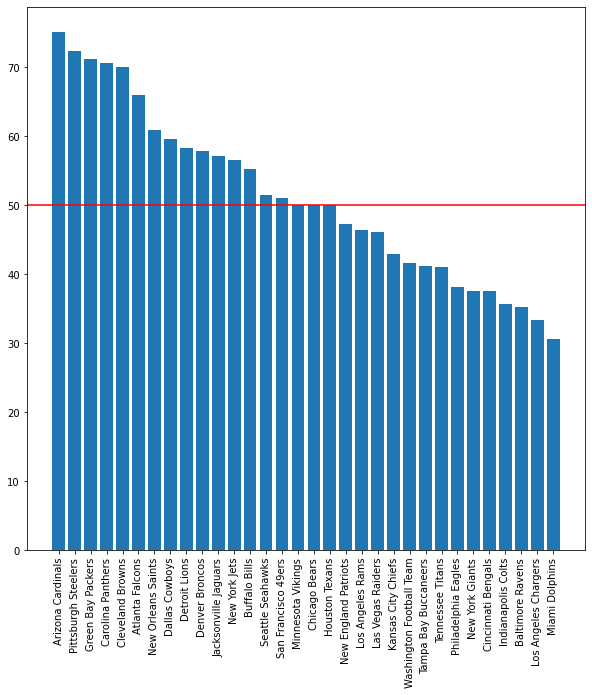

In [13]:
# Display teams records
fig = plt.figure(figsize=(10,10))
x = range(len(sort_ou_dict))
data = sort_ou_dict.values()
labels = sort_ou_dict.keys()


plt.bar(x=x, height=data)
plt.xticks(x, labels, rotation='vertical')
plt.axhline(y=50, color='red')
None

# MoneyLine analysis

In [14]:
ml_df = df[["Away", "Home", "Away Score", "Home Score", "Line"]]
ml_df["Line"].unique()

array(['Green Bay Packers -7.0', 'Green Bay Packers -14.0',
       'Kansas City Chiefs -3.5', 'Los Angeles Rams -3.0',
       'Dallas Cowboys -5.0', 'Green Bay Packers -13.5',
       'Las Vegas Raiders -10.0', 'Dallas Cowboys -3.0',
       'Indianapolis Colts -11.0', 'Indianapolis Colts -6.0',
       'Indianapolis Colts -18.0', 'New York Jets -2.0',
       'Minnesota Vikings -7.0', 'Dallas Cowboys -7.0',
       'Minnesota Vikings -8.0', 'Minnesota Vikings -12.0',
       'Kansas City Chiefs -2.5', 'Las Vegas Raiders -13.0',
       'Las Vegas Raiders -5.0', 'Indianapolis Colts -7.0',
       'Detroit Lions -3.0', 'Las Vegas Raiders -6.0',
       'Las Vegas Raiders -1.5', 'San Francisco 49ers -4.0',
       'Indianapolis Colts -2.5', 'Dallas Cowboys -1.0',
       'Kansas City Chiefs -3.0', 'Indianapolis Colts -4.0',
       'San Francisco 49ers -5.5', 'Miami Dolphins -1.0',
       'Dallas Cowboys -6.0', 'Pick', 'Pittsburgh Steelers -2.0',
       'Miami Dolphins -12.5', 'Washington Football T

### Create 2 new columns: Home Cover, Away Cover

All lines are - except for "pick" (convert "pick" to -0.0)

In [15]:
def whoCovered(df):
    cover_df = [] # to return results
    for i in range(len(df)):
        line = df.loc[i]["Line"]
        away_team = df.loc[i]["Away"]
        
        if(line != "Pick"):
            split_arr = line.split(" -")
            favorite = split_arr[0]   # string of team name
            spread = float(split_arr[1])
            
            # determine under-dog score vs (favorite-spread)
            if(favorite == away_team):
                favorite_score = df.loc[i]["Away Score"]
                under_dog_score = df.loc[i]["Home Score"]
            
            else:
                favorite_score = df.loc[i]["Home Score"]
                under_dog_score = df.loc[i]["Away Score"]
                
        elif(line == "Pick"):
            spread = 0
            favorite_score = df.loc[i]["Home Score"]
            under_dog_score = df.loc[i]["Away Score"]
        
        adjusted = favorite_score - spread
        # add [away_cover, home_cover] to cover_df
        if(adjusted == under_dog_score):  # push
            cover_df.append(["push", "push"])
        
        elif(adjusted > under_dog_score): # favorite covered
            cover_df.append(["loss", "cover"])
        
        else:                             # under-dog covered
            cover_df.append(["cover", "loss"])
    
    return(cover_df)

In [16]:
cover_list = whoCovered(ml_df)
cover_df = pd.DataFrame(cover_list, columns=["Away", "Home"])

ml_df["Away Cover"] = cover_df.apply(lambda row: row["Away"], axis=1)
ml_df["Home Cover"] = cover_df.apply(lambda row: row["Home"], axis=1)

ml_df

,Away,Home,Away Score,Home Score,Line,Away Cover,Home Cover
0,Green Bay Packers,Dallas Cowboys,34,27,Green Bay Packers -7.0,push,push
1,Kansas City Chiefs,Green Bay Packers,10,35,Green Bay Packers -14.0,loss,cover
2,Kansas City Chiefs,Buffalo Bills,31,7,Kansas City Chiefs -3.5,loss,cover
3,Los Angeles Rams,Green Bay Packers,7,28,Los Angeles Rams -3.0,cover,loss
4,Cleveland Browns,Dallas Cowboys,14,52,Dallas Cowboys -5.0,loss,cover
...,...,...,...,...,...,...,...
529,Cleveland Browns,Kansas City Chiefs,17,22,Kansas City Chiefs -7.5,cover,loss
530,Tampa Bay Buccaneers,New Orleans Saints,30,20,New Orleans Saints -2.5,cover,loss
531,Buffalo Bills,Kansas City Chiefs,24,38,Kansas City Chiefs -3.0,loss,cover
532,Tampa Bay Buccaneers,Green Bay Packers,31,26,Green Bay Packers -3.0,cover,loss


### Calculate each team's record vs the spread

In [17]:
# use list "all_names" from O/U analysis above to create dictionary for record against the spread
team_spread_dict = dict.fromkeys(all_names, [0,0])

# iterate through df and add [wins, total] as value for each team
# "push" counts as half a win

for i in range(len(ou_df)):
    away = ml_df.loc[i]["Away"]
    home = ml_df.loc[i]["Home"]
    
    away_arr = team_spread_dict[away]
    home_arr = team_spread_dict[home]
    
    away_wins = away_arr[0]
    away_appear = away_arr[1]
    home_wins = home_arr[0]
    home_appear = home_arr[1]
    
    if(ml_df.loc[i]["Away Cover"] == "cover"):
        away_new_arr = [away_wins+1, away_appear+1]
        home_new_arr = [home_wins, home_appear+1]
    elif(ou_df.loc[i]["O/U Result"] == "push"):
        away_new_arr = [away_wins+0.5, away_appear+1]
        home_new_arr = [home_wins+0.5, home_appear+1]
    else:
        away_new_arr = [away_wins, away_appear+1]
        home_new_arr = [home_wins+1, home_appear+1]
    
    team_spread_dict[away] = away_new_arr
    team_spread_dict[home] = home_new_arr
    
team_spread_dict

{'Las Vegas Raiders': [22, 43],
 'New York Jets': [16, 25],
 'Minnesota Vikings': [24.5, 46],
 'Dallas Cowboys': [34, 58],
 'Miami Dolphins': [20, 40],
 'Washington Football Team': [23, 34],
 'Pittsburgh Steelers': [32, 53],
 'Denver Broncos': [16, 36],
 'Los Angeles Rams': [18, 36],
 'Tennessee Titans': [11.5, 30],
 'Buffalo Bills': [13, 26],
 'New York Giants': [20.5, 31],
 'Tampa Bay Buccaneers': [7, 15],
 'Los Angeles Chargers': [10.5, 23],
 'San Francisco 49ers': [21, 48],
 'Arizona Cardinals': [3, 11],
 'New England Patriots': [19, 40],
 'Cleveland Browns': [9, 20],
 'Detroit Lions': [5, 11],
 'Atlanta Falcons': [6, 19],
 'Green Bay Packers': [21, 39],
 'Seattle Seahawks': [9, 22],
 'Chicago Bears': [12.5, 23],
 'Kansas City Chiefs': [6, 22],
 'Indianapolis Colts': [17, 38],
 'Philadelphia Eagles': [14.5, 35],
 'New Orleans Saints': [7, 16],
 'Cincinnati Bengals': [8, 17],
 'Jacksonville Jaguars': [6, 11],
 'Carolina Panthers': [6, 11],
 'Baltimore Ravens': [11, 21],
 'Houston Te

In [18]:
# convert [wins, appearances] to win%
team_spread_dict_perc = dict.fromkeys(team_spread_dict, 0.0)
for key in team_spread_dict_perc:
    team_spread_dict_perc[key] = round(float(100*team_spread_dict[key][0]/team_spread_dict[key][1]),2)

# sorted by highest win percentage
sort_spread_dict = dict(sorted(team_spread_dict_perc.items(), key=lambda item: item[1], reverse=True))
sort_spread_dict

{'Houston Texans': 75.0,
 'Washington Football Team': 67.65,
 'New York Giants': 66.13,
 'New York Jets': 64.0,
 'Pittsburgh Steelers': 60.38,
 'Dallas Cowboys': 58.62,
 'Jacksonville Jaguars': 54.55,
 'Carolina Panthers': 54.55,
 'Chicago Bears': 54.35,
 'Green Bay Packers': 53.85,
 'Minnesota Vikings': 53.26,
 'Baltimore Ravens': 52.38,
 'Las Vegas Raiders': 51.16,
 'Miami Dolphins': 50.0,
 'Los Angeles Rams': 50.0,
 'Buffalo Bills': 50.0,
 'New England Patriots': 47.5,
 'Cincinnati Bengals': 47.06,
 'Tampa Bay Buccaneers': 46.67,
 'Los Angeles Chargers': 45.65,
 'Detroit Lions': 45.45,
 'Cleveland Browns': 45.0,
 'Indianapolis Colts': 44.74,
 'Denver Broncos': 44.44,
 'San Francisco 49ers': 43.75,
 'New Orleans Saints': 43.75,
 'Philadelphia Eagles': 41.43,
 'Seattle Seahawks': 40.91,
 'Tennessee Titans': 38.33,
 'Atlanta Falcons': 31.58,
 'Arizona Cardinals': 27.27,
 'Kansas City Chiefs': 27.27}

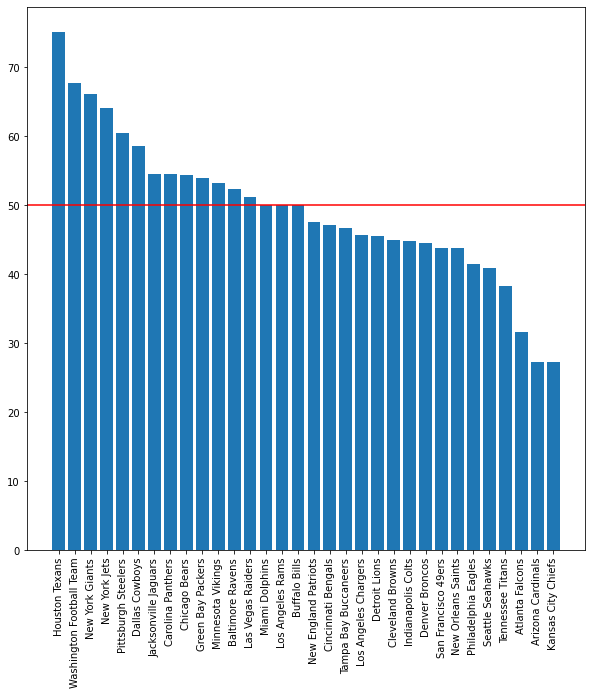

In [19]:
# Display teams records
fig = plt.figure(figsize=(10,10))
x = range(len(sort_spread_dict))
data = sort_spread_dict.values()
labels = sort_spread_dict.keys()


plt.bar(x=x, height=data)
plt.xticks(x, labels, rotation='vertical')
plt.axhline(y=50, color='red')
None

# Team passing and rushing analysis

In [20]:
yards_df = df[["Away", "Home", "Away Rushing", "Home Rushing", "Away Passing", "Home Passing"]]
yards_df

,Away,Home,Away Rushing,Home Rushing,Away Passing,Home Passing
0,Green Bay Packers,Dallas Cowboys,102,187,28,31
1,Kansas City Chiefs,Green Bay Packers,72,130,32,24
2,Kansas City Chiefs,Buffalo Bills,113,40,24,27
3,Los Angeles Rams,Green Bay Packers,75,163,31,23
4,Cleveland Browns,Dallas Cowboys,159,178,30,15
...,...,...,...,...,...,...
529,Cleveland Browns,Kansas City Chiefs,112,123,37,38
530,Tampa Bay Buccaneers,New Orleans Saints,127,104,33,35
531,Buffalo Bills,Kansas City Chiefs,129,114,48,38
532,Tampa Bay Buccaneers,Green Bay Packers,76,67,36,48


## Things to analyze

In [21]:
# average rushing yards for
# average passing yards for
# average total yards for
# average rushing yards against
# average passing yards against
# average total yards against